In [24]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from PIL import Image
import helpers
import model
import train
import torch
import numpy as np

In [25]:
# Loaded a set of images
root_dir = "training/"

default_image_dir = root_dir + "images/"
rotated_image_dir = root_dir + "rotated_images/"
flipped_image_dir = root_dir + "flipped_images/"

default_files = os.listdir(default_image_dir)
rotated_files = os.listdir(rotated_image_dir)
flipped_files = os.listdir(flipped_image_dir)
n = min(100, len(default_files + rotated_files + flipped_files)) # Load maximum 20 images
print("Loading " + str(3 * n) + " images")
default_imgs = [helpers.load_image(default_image_dir + default_files[i]) for i in range(n)]
rotated_imgs = [helpers.load_image(rotated_image_dir + rotated_files[i]) for i in range(n)]
flipped_imgs = [helpers.load_image(flipped_image_dir + flipped_files[i]) for i in range(n)]
imgs = default_imgs + rotated_imgs + flipped_imgs



default_gt_dir = root_dir + "groundtruth/"
rotated_gt_dir = root_dir + "rotated_groundtruth/"
flipped_gt_dir = root_dir + "flipped_groundtruth/"
print("Loading " + str(3 * n) + " images")
default_gt_imgs = [helpers.load_image(default_gt_dir + default_files[i]) for i in range(n)]
rotated_gt_imgs = [helpers.load_image(rotated_gt_dir + rotated_files[i]) for i in range(n)]
flipped_gt_imgs = [helpers.load_image(flipped_gt_dir + flipped_files[i]) for i in range(n)]
gt_imgs = default_gt_imgs + rotated_gt_imgs + flipped_gt_imgs

n = 300  # Only use 10 images for training

Loading 300 images
Loading 300 images


In [26]:
# Extract patches from input images
patch_size = 16  # each patch is 16*16 pixels

img_patches = [helpers.img_crop(imgs[i], patch_size, patch_size) for i in range(n)]
gt_patches = [helpers.img_crop(gt_imgs[i], patch_size, patch_size) for i in range(n)]

# Linearize list of patches
img_patches = np.asarray(
    [
        img_patches[i][j]
        for i in range(len(img_patches))
        for j in range(len(img_patches[i]))
    ]
)
gt_patches = np.asarray(
    [
        gt_patches[i][j]
        for i in range(len(gt_patches))
        for j in range(len(gt_patches[i]))
    ]
)

In [27]:

# use the model in model.py to train the network
model = model.UNet()
#model = train.build_unet()

inputs = torch.randn((1, 3, 400, 400))

print(inputs.shape)

# convert img_patches to shape (n, 3, 512, 512)
images = np.zeros((n, 3, 400, 400))
for i in range(n):
    images[i] = imgs[i].transpose(2, 0, 1)

#convert imges[0] to shape torch.Size([1, 3, 400, 400])
inputs = torch.from_numpy(images[:50])

#convert all inputs values to float
inputs = inputs.float()

print(inputs.shape)

y = model(inputs)


#display y[0] and gt_patches[0] to see if the network is working
#plt.imshow(helpers.concatenate_images(y[0], gt_patches[0]))



torch.Size([1, 3, 400, 400])
torch.Size([50, 3, 400, 400])


torch.Size([50, 1, 212, 212])
(400, 400)


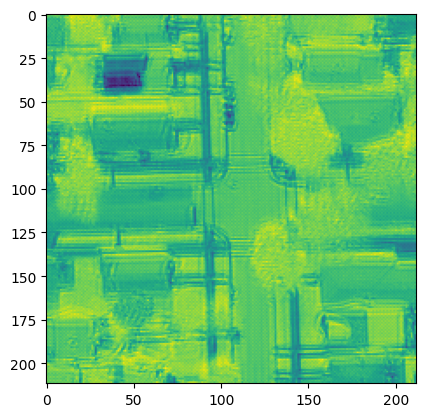

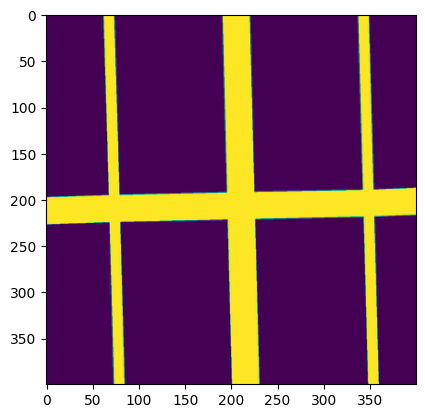

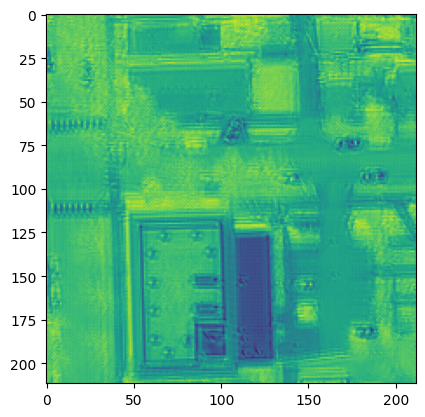

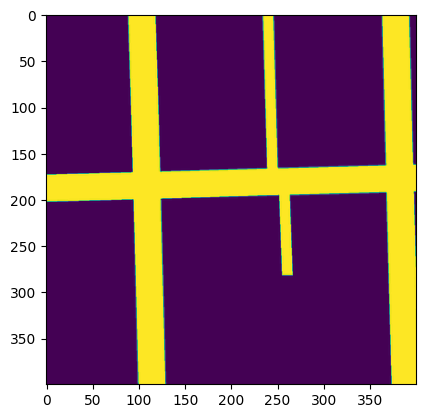

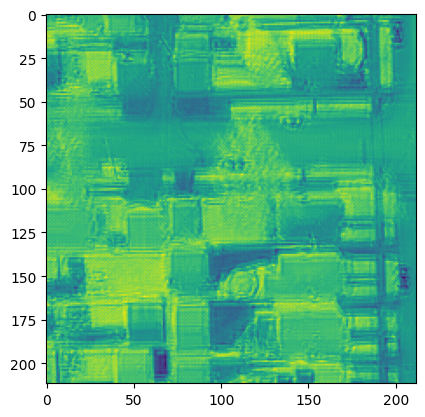

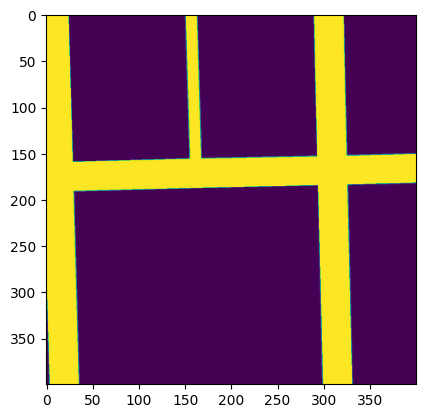

In [28]:
print (y.shape)
print (gt_imgs[0].shape)

# for every value of y[0] that is greater than 0.5, set it to 1, else set it to 0




plt.imshow(y[0].detach().numpy().transpose(1, 2, 0))
plt.show()
plt.imshow(gt_imgs[0])
plt.show()

plt.imshow(y[1].detach().numpy().transpose(1, 2, 0))
plt.show()
plt.imshow(gt_imgs[1])
plt.show()

plt.imshow(y[2].detach().numpy().transpose(1, 2, 0))
plt.show()
plt.imshow(gt_imgs[2])
plt.show()
